# Breast Cancer Prediction

## Import Revelvent Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.metrics import balanced_accuracy_score,recall_score,precision_score

In [2]:
#!pip install lightgbm

In [3]:
#!pip install catboost

## Data Collection

In [4]:
raw_data = pd.read_csv('breast-cancer.csv', index_col = False)
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data = raw_data

## Data Exploration

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
data['diagnosis'].dtypes

dtype('O')

In [11]:
data = pd.get_dummies(data,dtype='int',drop_first = True)

In [12]:
data.shape

(569, 32)

In [13]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
data['diagnosis_M'].value_counts()

diagnosis_M
0    357
1    212
Name: count, dtype: int64

In [15]:
data.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [16]:
data['diagnosis_M'].dtypes

dtype('int32')

In [17]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
data.duplicated().sum()

0

## Data Is ready for EDA & Feature Engineering

## Exploratory Data Analysis

### Univariate Analysis

In [207]:
data_df = data.drop(['id','diagnosis_M'], axis = 1)
data_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [208]:
data_univariate = pd.DataFrame(index = ['Mean','Median','Mode','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','1.5_Rule',
                                         'Lesser_outlier','Greater_outlier','Min','Max','Skew','Kurtosis','Variance','STD'], columns = data_df.columns)

In [211]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [228]:
for col in data_df.columns:
    data_univariate[col]['Mean'] = data_df[col].mean()
    data_univariate[col]['Median'] = data_df[col].median()
    data_univariate[col]['Mode'] = data_df[col].mode()[0]
    data_univariate[col]['Q1:25%'] = data_df.describe()[col]['25%']
    data_univariate[col]['Q2:50%'] = data_df.describe()[col]['50%']
    data_univariate[col]['Q3:75%'] = data_df.describe()[col]['75%']
    data_univariate[col]['99%'] = np.percentile(data_df[col],99)
    data_univariate[col]['Q4:100%'] = data_df.describe()[col]['max']
    data_univariate[col]['IQR'] = data_univariate[col]['Q3:75%'] - data_univariate[col]['Q1:25%']
    data_univariate[col]['1.5_Rule'] = 1.5 * data_univariate[col]['IQR']
    data_univariate[col]['Lesser_outlier'] = data_univariate[col]['Q1:25%'] - data_univariate[col]['1.5_Rule']
    data_univariate[col]['Greater_outlier'] = data_univariate[col]['Q3:75%'] + data_univariate[col]['1.5_Rule']
    data_univariate[col]['Min'] = data_df[col].min()
    data_univariate[col]['Max'] = data_df[col].max()
    data_univariate[col]['Skew'] = data_df[col].skew()
    data_univariate[col]['Kurtosis'] = data_df[col].kurtosis()
    data_univariate[col]['Variance'] = data_df[col].var()
    data_univariate[col]['STD'] = data_df[col].std()

In [229]:
data_univariate

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.26919,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
Median,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.0335,0.1792,0.06154,...,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
Mode,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,...,12.36,17.7,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
Q1:25%,11.7,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.0577,...,13.01,21.08,84.11,515.3,0.1166,0.1472,0.1145,0.06493,0.2504,0.07146
Q2:50%,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.0335,0.1792,0.06154,...,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
Q3:75%,15.78,21.8,104.1,782.7,0.1053,0.1304,0.1307,0.074,0.1957,0.06612,...,18.79,29.72,125.4,1084.0,0.146,0.3391,0.3829,0.1614,0.3179,0.09208
99%,24.3716,30.652,165.724,1786.6,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,...,30.7628,41.8024,208.304,2918.16,0.188908,0.778644,0.90238,0.269216,0.486908,0.140628
Q4:100%,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,...,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075
IQR,4.08,5.63,28.93,362.4,0.01893,0.06548,0.10114,0.05369,0.0338,0.00842,...,5.78,8.64,41.29,568.7,0.0294,0.1919,0.2684,0.09647,0.0675,0.02062
1.5_Rule,6.12,8.445,43.395,543.6,0.028395,0.09822,0.15171,0.080535,0.0507,0.01263,...,8.67,12.96,61.935,853.05,0.0441,0.28785,0.4026,0.144705,0.10125,0.03093


### Bivariate Analysis

### Distribution of diagnosis categories

In [144]:
Diagnosis_count = data['diagnosis_M'].value_counts()
Diagnosis_count

diagnosis_M
0    357
1    212
Name: count, dtype: int64

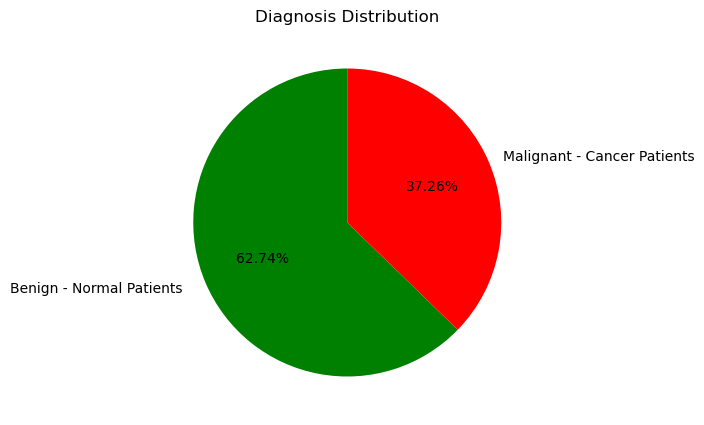

In [167]:
labels = ['Benign - Normal Patients  ','Malignant - Cancer Patients']
colors = ['green','red']

plt.figure(figsize=(5,5))
plt.pie(Diagnosis_count,
       labels = labels,
       autopct = '%1.2f%%',
       colors=colors,
       startangle = 90)
plt.title('Diagnosis Distribution')
plt.show()

### Distributions of each features based on Diagnosis

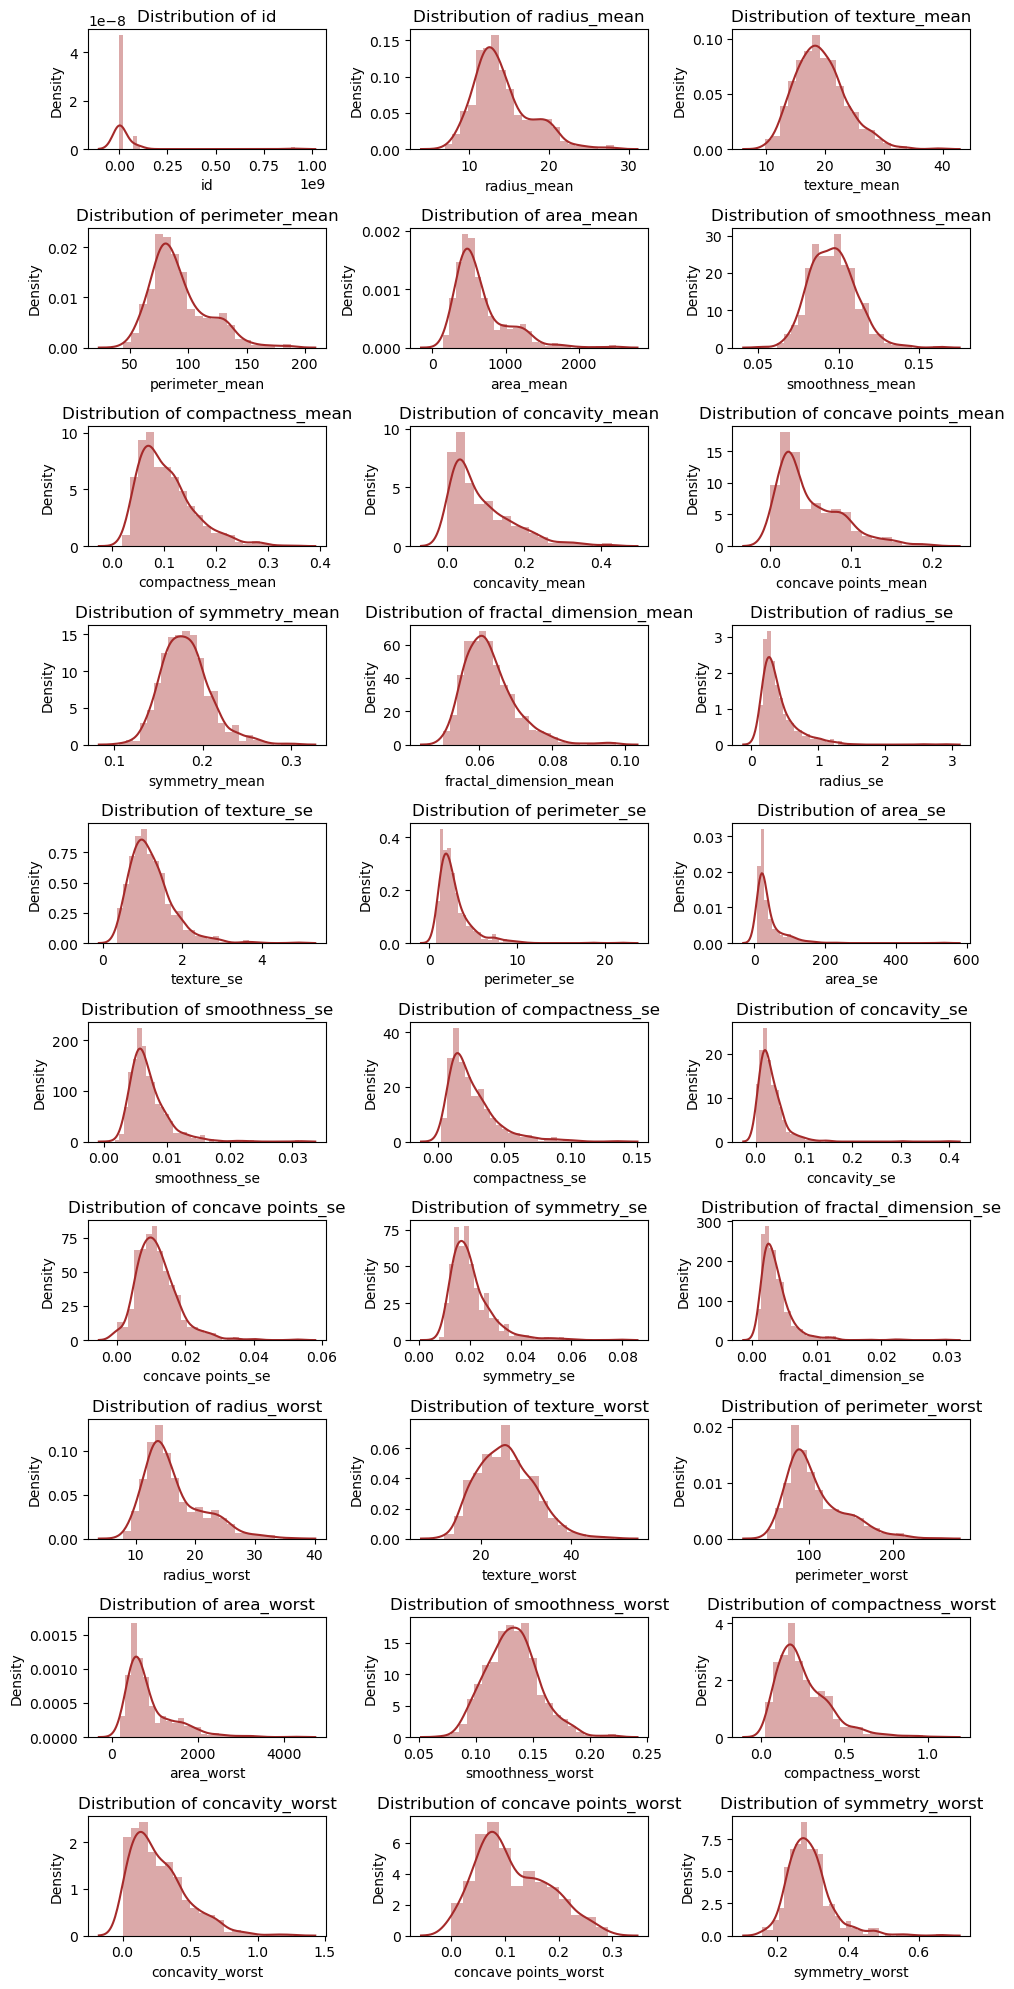

In [200]:
plt.figure(figsize=(10,20))
plot_number = 1
labels = {0 : 'Benign', 1 : 'Malignant'}
for col in data.columns:
    if plot_number <= 30:
        ax = plt.subplot(10,3,plot_number)
        sb.distplot(data[col],kde=True,color ='brown')
        ax.set_xlabel(col)
        ax.set_title(f'Distribution of {col}')
    plot_number += 1
    
plt.tight_layout()
plt.show()

### Relations between all the features

In [201]:
corr = data.corr()
corr.drop(['id'],axis=0, inplace = True)
corr.drop(['id'],axis=1, inplace = True)

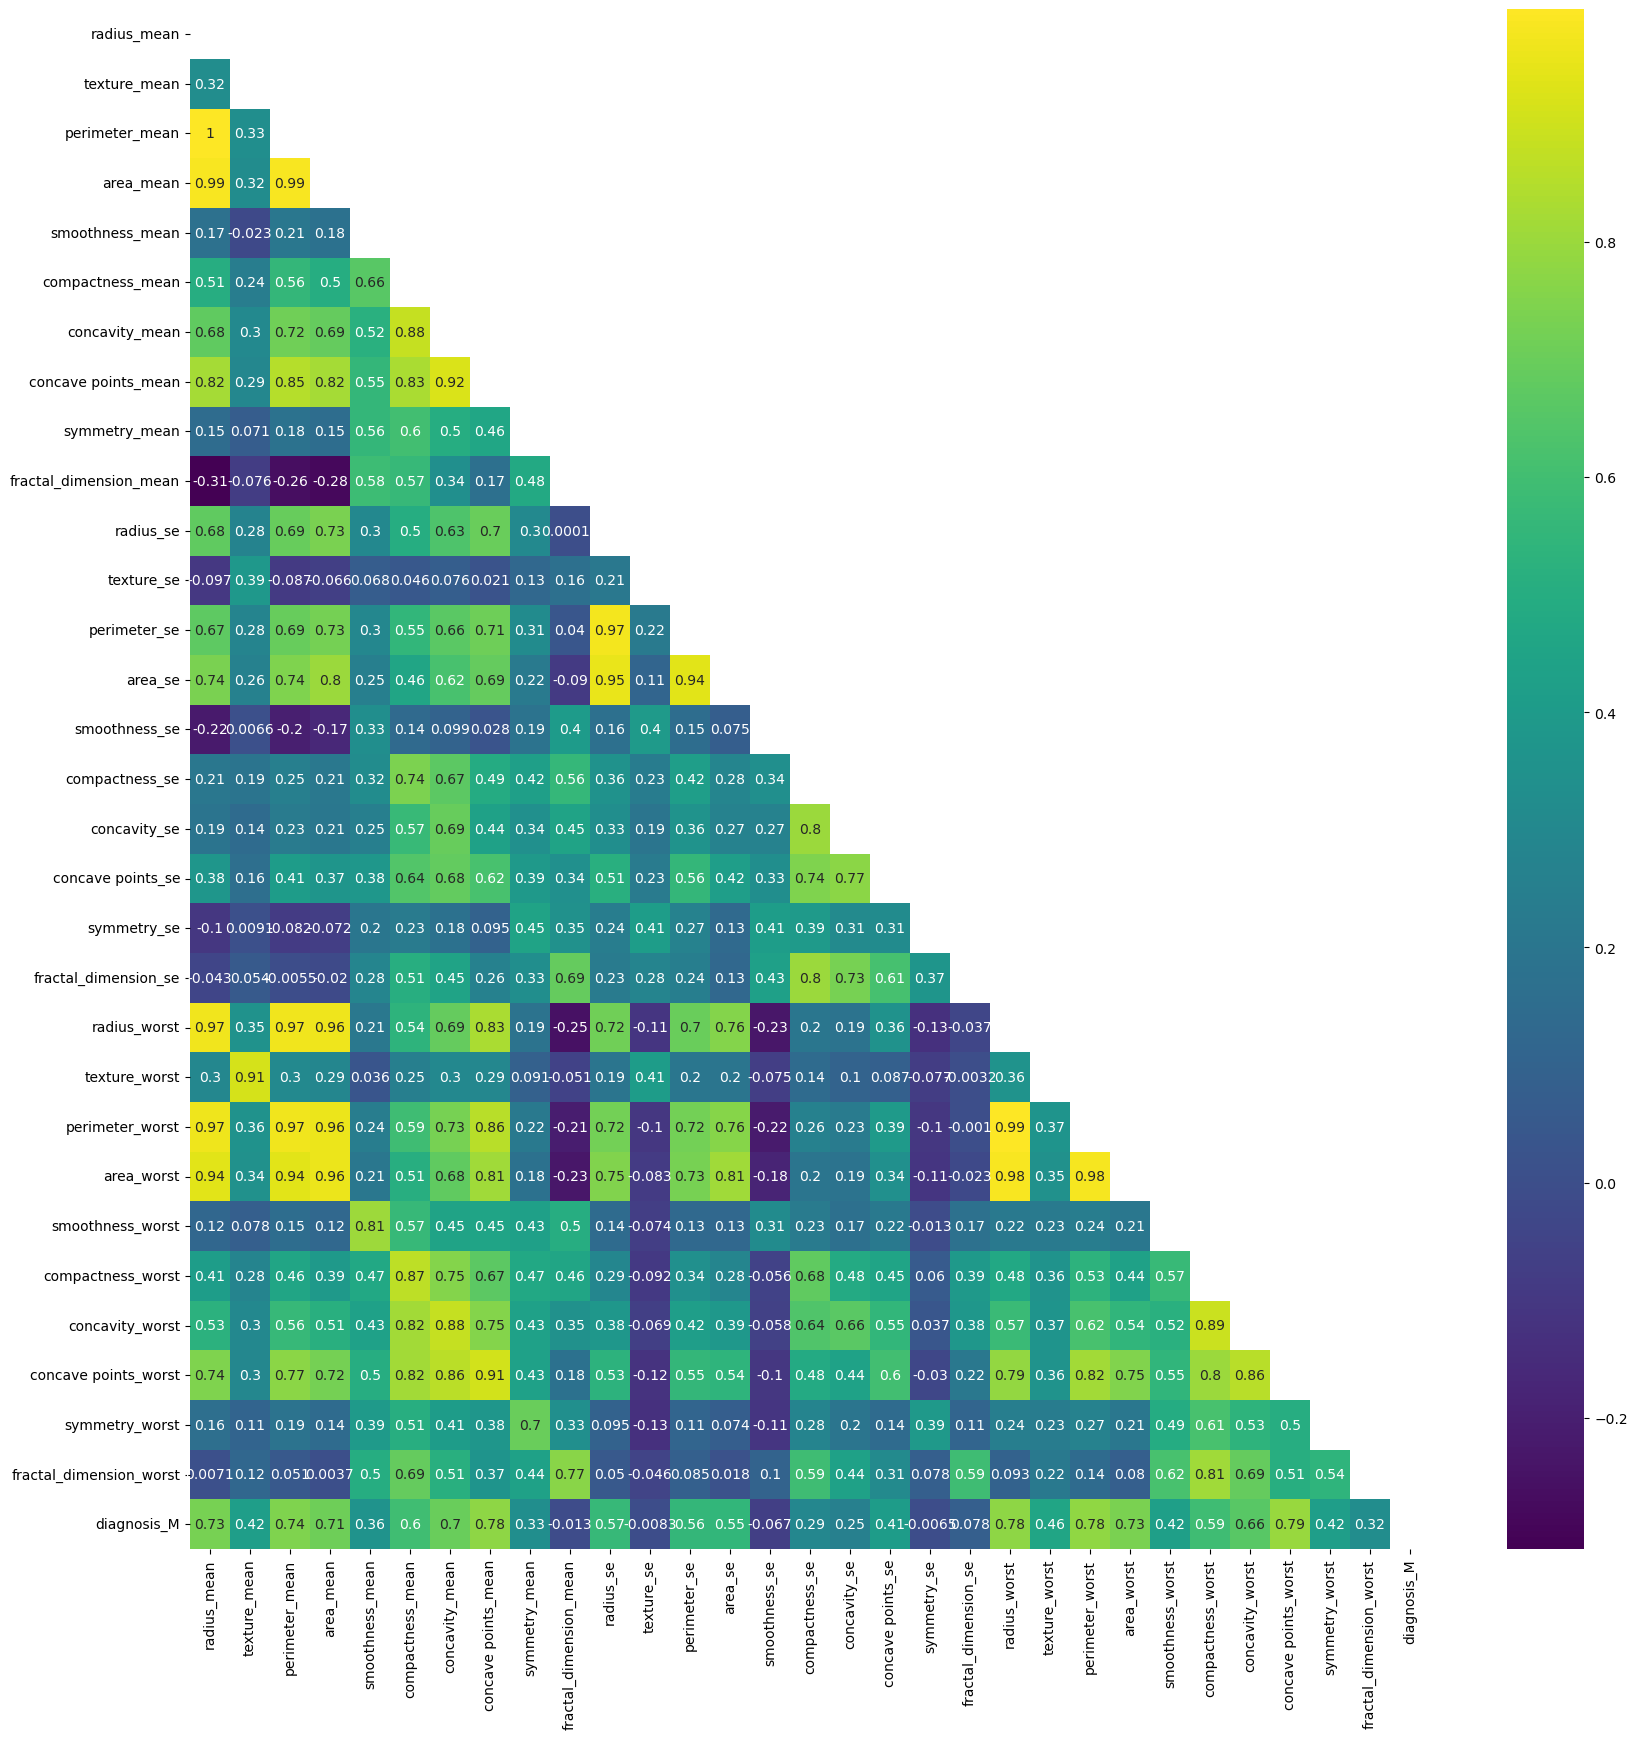

In [202]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,20))
sb.heatmap(corr, cmap='viridis',annot=True, mask=mask)
plt.show()

## Creating Functions for Feature Selection & Model Creations

In [19]:
def rfefeatures(indep_x,dep_y,n):
    rfelist = []

    log_model = LogisticRegression()
    knn_model = KNeighborsClassifier()
    nav_model = GaussianNB()
    svm_model = SVC()
    dc_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    xgb_model = XGBClassifier()
    lgbm_model = LGBMClassifier()
    cat_model = CatBoostClassifier()

    rfemodellist = [log_model,knn_model,nav_model,svm_model,dc_model,rf_model,xgb_model,lgbm_model,cat_model]

    for model in rfemodellist:
        rfe = RFE(estimator = model, n_features_to_select=n)
        rfe_model = rfe.fit(indep_x,dep_y)
        rfe_features = rfe_model.transform(indep_x)  
        rfelist.append(rfe_features)
        selected_indices = rfe_model.get_support(indices=True)
        rfe_features_names = indep_x.columns[selected_indices]
        return rfelist, rfe_features_names.tolist()

In [20]:
def split_scaler(indep_x,dep_y):
    x_train,x_test,y_train,y_test = train_test_split(indep_x,dep_y,test_size=0.2,random_state=0)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train,x_test,y_train,y_test,sc

In [21]:
def cm_prediction(classifier,x_test,y_test):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    return classifier,cm,accuracy,report

In [22]:
def logistic(x_train,y_train,x_test,y_test):
    classifier = LogisticRegression()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [23]:
def knn(x_train,y_train,x_test,y_test):
    classifier = KNeighborsClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [24]:
def naive(x_train,y_train,x_test,y_test):
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [25]:
def svm_linear(x_train,y_train,x_test,y_test):
    classifier = SVC()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [26]:
def svm_nonlinear(x_train,y_train,x_test,y_test):
    Classifier = SVC()
    Classifier.fit(x_train,y_train)
    return cm_prediction(Classifier,x_test,y_test)

In [27]:
def decision(x_train,y_train,x_test,y_test):
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [28]:
def random(x_train,y_train,x_test,y_test):
    classifier = RandomForestClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [29]:
def xgboost(x_train,y_train,x_test,y_test):
    classifier = XGBClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [30]:
def lgbm(x_train,y_train,x_test,y_test):
    classifier = LGBMClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [31]:
def catboost(x_train,y_train,x_test,y_test):
    classifier = CatBoostClassifier()
    classifier.fit(x_train,y_train)
    return cm_prediction(classifier,x_test,y_test)

In [32]:
def rfe_classification(acc_log,acc_knn,acc_nav,acc_svml,acc_svmnl,acc_dc,acc_rf,acc_xgb,acc_lgbm,acc_catb):
    rfe_dataframe = pd.DataFrame(index = ['Logistic','KNN','Naive','SVM','Decision','Random','XGBoost','LightGBM','CatBoost'], 
                                 columns = ['Logistic','KNN','Naive','SVM_l','SVM_nl','Decision','Random','XGBoost','LightGBM','CatBoost'])
    for index in rfe_dataframe.index:
        rfe_dataframe['Logistic'][index] = acc_log
        rfe_dataframe['KNN'][index] = acc_knn
        rfe_dataframe['Naive'][index] = acc_nav
        rfe_dataframe['SVM_l'][index] = acc_svml
        rfe_dataframe['SVM_nl'][index] = acc_svmnl
        rfe_dataframe['Decision'][index] = acc_dc
        rfe_dataframe['Random'][index] = acc_rf
        rfe_dataframe['XGBoost'][index] = acc_xgb
        rfe_dataframe['LightGBM'][index] = acc_lgbm
        rfe_dataframe['CatBoost'][index] = acc_catb
    return rfe_dataframe

## Input Output Split

In [33]:
data.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


In [34]:
indep_x = data.drop(['diagnosis_M'],axis=1)
dep_y = data['diagnosis_M']

In [35]:
indep_x.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [36]:
dep_y.head(1)

0    1
Name: diagnosis_M, dtype: int32

## Feature Engineering

In [37]:
rfelist,rfe_features_names = rfefeatures(indep_x,dep_y,6)

acc_log = []
acc_knn = []
acc_nav = []
acc_svml = []
acc_svmnl = []
acc_dc = []
acc_rf = []
acc_xgb = []
acc_lgbm = [] 
acc_catb = []

In [38]:
rfelist

[array([[17.99   ,  0.9053 , 25.38   ,  0.6656 ,  0.7119 ,  0.2654 ],
        [20.57   ,  0.7339 , 24.99   ,  0.1866 ,  0.2416 ,  0.186  ],
        [19.69   ,  0.7869 , 23.57   ,  0.4245 ,  0.4504 ,  0.243  ],
        ...,
        [16.6    ,  1.075  , 18.98   ,  0.3094 ,  0.3403 ,  0.1418 ],
        [20.6    ,  1.595  , 25.74   ,  0.8681 ,  0.9387 ,  0.265  ],
        [ 7.76   ,  1.428  ,  9.456  ,  0.06444,  0.     ,  0.     ]])]

In [39]:
rfe_features_names

['radius_mean',
 'texture_se',
 'radius_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

# Train Test Split

## Model Creation & Model Evaluation

In [40]:
for i in rfelist:
    x_train,x_test,y_train,y_test,sc = split_scaler(i,dep_y)

In [41]:
x_train.shape

(455, 6)

In [42]:
y_train.shape

(455,)

In [43]:
x_test.shape

(114, 6)

In [44]:
y_test.shape

(114,)

In [45]:
sc

StandardScaler()

In [46]:
classifier,cm,accuracy,report = logistic(x_train,y_train,x_test,y_test)
acc_log.append(accuracy)

classifier,cm,accuracy,report = knn(x_train,y_train,x_test,y_test)
acc_knn.append(accuracy)

classifier,cm,accuracy,report = naive(x_train,y_train,x_test,y_test)
acc_nav.append(accuracy)

classifier,cm,accuracy,report = svm_linear(x_train,y_train,x_test,y_test)
acc_svml.append(accuracy)

classifier,cm,accuracy,report = svm_nonlinear(x_train,y_train,x_test,y_test)
acc_svmnl.append(accuracy)

classifier,cm,accuracy,report = decision(x_train,y_train,x_test,y_test)
acc_dc.append(accuracy)

classifier,cm,accuracy,report = random(x_train,y_train,x_test,y_test)
acc_rf.append(accuracy)

classifier,cm,accuracy,report = xgboost(x_train,y_train,x_test,y_test)
acc_xgb.append(accuracy)

classifier,cm,accuracy,report = lgbm(x_train,y_train,x_test,y_test)
acc_lgbm.append(accuracy)

classifier,cm,accuracy,report = catboost(x_train,y_train,x_test,y_test)
acc_catb.append(accuracy)

[LightGBM] [Info] Number of positive: 165, number of negative: 290
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362637 -> initscore=-0.563935
[LightGBM] [Info] Start training from score -0.563935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [47]:
result = rfe_classification(acc_log[0],acc_knn[0],acc_nav[0],acc_svml[0],acc_svmnl[0],acc_dc[0],acc_rf[0],acc_xgb[0],acc_lgbm[0],acc_catb[0])

In [48]:
result

,Logistic,KNN,Naive,SVM_l,SVM_nl,Decision,Random,XGBoost,LightGBM,CatBoost
Logistic,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
KNN,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
Naive,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
SVM,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
Decision,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
Random,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
XGBoost,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
LightGBM,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596
CatBoost,0.929825,0.921053,0.929825,0.921053,0.921053,0.947368,0.95614,0.964912,0.964912,0.938596


## XGBClassifier

In [94]:
classifier,cm,accuracy,report = xgboost(x_train,y_train,x_test,y_test)
print('Accuracy :\n ', accuracy)
print('Classification Report :\n', report)

Accuracy :
  0.9649122807017544
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



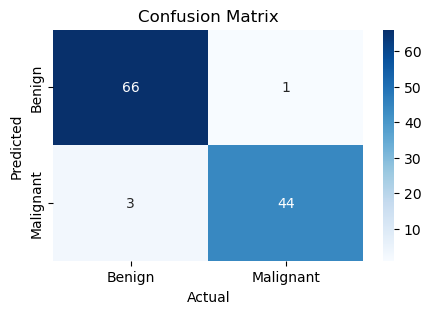

In [104]:
plt.figure(figsize=(5,3))
sb.heatmap(cm, annot = True, cmap='Blues',
          xticklabels = ['Benign','Malignant'],
          yticklabels = ['Benign','Malignant'])
plt.title('Confusion Matrix XGBClassifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix")
plt.show()

## Model Validation - HyperParameter Tuning through GridSearchCV

params_grid = {'criterion' : ['ginni', 'entropy', 'log_loss'],  # This parameter is tree-specific
              'max_features': ['sqrt','log2'],
             'class_weight':['balanced','balanced_subsample']}

grid = GridSearchCV(RandomForestClassifier(),params_grid, verbose = 3, refit = True, n_jobs=-1, scoring = 'accuracy')
grid.fit(x_train,y_train)

In [72]:
params_grid = {'loss' : ['log_loss', 'exponential'], 
               'criterion' : ['friedman_mse', 'squared_error'],
               'max_features' : ['sqrt', 'log2'],
               'learning_rate': [0.1],
               'n_estimators': [50,100,500,1000]}

grid = GridSearchCV(XGBClassifier(),params_grid, verbose = 3, refit = True, n_jobs=-1, scoring = 'f1_weighted')
grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[10:40:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "loss", "max_features" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 500, 1000]},
             scoring='f1_weighted', verbose=3)

In [73]:
results = grid.cv_results_

In [74]:
grid_prediction = grid.predict(x_test)

## Model Evaluation

### Confusion Matrix

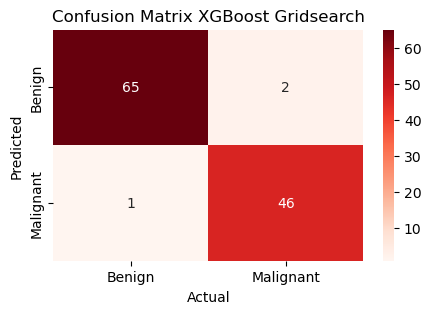

In [107]:
cm = confusion_matrix(y_test,grid_prediction)
plt.figure(figsize=(5,3))
sb.heatmap(cm,annot=True,cmap='Reds',
          xticklabels = ['Benign', 'Malignant'],
          yticklabels = ['Benign', 'Malignant'])
plt.title('Confusion Matrix XGBoost Gridsearch')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Accuracy

In [76]:
accuracy = accuracy_score(y_test,grid_prediction)
print('Accuracy : \n\n',accuracy)

Accuracy : 

 0.9736842105263158


### Classification Report

In [77]:
report = classification_report(y_test,grid_prediction)
print('Classification Report : \n\n',report)

Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Best parameters from GridSearch & F1 Score

In [78]:
f1_average_score = f1_score(y_test,grid_prediction, average ='macro')
print('Best Parameter {} :'.format(grid.best_params_),f1_average_score)

Best Parameter {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 100} : 0.9729323308270676


### ROC AUC Score - To Check the Quality of the classification

In [79]:
roc_score = roc_auc_score(y_test,grid_prediction)
print('ROC_AUC_score : \n\n',roc_score)

ROC_AUC_score : 

 0.9744363289933312


### Table of Grid Search Cross Validation & HyperTuning Paramaters

In [80]:
GridTable = pd.DataFrame(results)
GridTable

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_learning_rate,param_loss,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068350,0.005237,0.010430,0.001546,friedman_mse,0.1,log_loss,sqrt,50,"{'criterion': 'friedman_mse', 'learning_rate':...",0.945226,0.956044,0.899089,0.933594,0.945226,0.935836,0.019698,25
1,0.118644,0.011572,0.013183,0.005226,friedman_mse,0.1,log_loss,sqrt,100,"{'criterion': 'friedman_mse', 'learning_rate':...",0.934066,0.956044,0.899089,0.944867,0.956044,0.938022,0.021109,1
2,0.313709,0.019787,0.009744,0.000580,friedman_mse,0.1,log_loss,sqrt,500,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912088,0.944867,0.910717,0.944867,0.966920,0.935892,0.021560,9
3,0.519187,0.008597,0.008609,0.001007,friedman_mse,0.1,log_loss,sqrt,1000,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912088,0.944867,0.910717,0.944867,0.966920,0.935892,0.021560,9
4,0.064739,0.006225,0.006791,0.001007,friedman_mse,0.1,log_loss,log2,50,"{'criterion': 'friedman_mse', 'learning_rate':...",0.945226,0.956044,0.899089,0.933594,0.945226,0.935836,0.019698,25
5,0.109645,0.019592,0.007873,0.001042,friedman_mse,0.1,log_loss,log2,100,"{'criterion': 'friedman_mse', 'learning_rate':...",0.934066,0.956044,0.899089,0.944867,0.956044,0.938022,0.021109,1
6,0.323597,0.020031,0.007509,0.001625,friedman_mse,0.1,log_loss,log2,500,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912088,0.944867,0.910717,0.944867,0.966920,0.935892,0.021560,9
7,0.556994,0.033844,0.013178,0.006113,friedman_mse,0.1,log_loss,log2,1000,"{'criterion': 'friedman_mse', 'learning_rate':...",0.912088,0.944867,0.910717,0.944867,0.966920,0.935892,0.021560,9
8,0.068361,0.007074,0.008127,0.002288,friedman_mse,0.1,exponential,sqrt,50,"{'criterion': 'friedman_mse', 'learning_rate':...",0.945226,0.956044,0.899089,0.933594,0.945226,0.935836,0.019698,25
9,0.113980,0.009708,0.007172,0.000507,friedman_mse,0.1,exponential,sqrt,100,"{'criterion': 'friedman_mse', 'learning_rate':...",0.934066,0.956044,0.899089,0.944867,0.956044,0.938022,0.021109,1


## Save the Model 

In [81]:
filename = 'Finalized_BreastCancerPrediction_Model.sav'
pickle.dump(grid,open(filename,'wb'))

In [82]:
filenamesSC = 'sc.pkl'
pickle.dump(sc,open(filenamesSC,'wb'))

In [83]:
sc = pickle.load(open('sc.pkl','rb'))

## Prediction - Example for Benign (Normal Range)

In [84]:
user_input = sc.transform([[8,0.9,15,0.10,0.2,0.05]])
user_input

array([[-1.73085677, -0.57240581, -0.25712413, -0.99294386, -0.33844154,
        -0.987719  ]])

In [85]:
loaded_model = pickle.load(open('Finalized_BreastCancerPrediction_Model.sav','rb'))
Prediction = loaded_model.predict(user_input)

In [86]:
Prediction

array([0])

## Prediction - Example for Malignant (Abnormal Range)

In [87]:
user_input = sc.transform([[20,3,25,0.50,0.8,0.5]])
user_input

array([[1.66714486, 3.30667528, 1.7898849 , 1.62244344, 2.67031397,
        5.90893892]])

In [88]:
loaded_model = pickle.load(open('Finalized_BreastCancerPrediction_Model.sav','rb'))
Prediction = loaded_model.predict(user_input)

In [89]:
Prediction

array([1])

Ranges for Benign and Malignant

Feature	              Benign (Normal Range)	     Malignant (Abnormal Range)
radius_mean	             6 to 12	                15 to 30
texture_se	             0.5 to 1.2	                1.5 to 4.0
radius_worst	         10 to 20	                20 to 40
compactness_worst	     0.02 to 0.15	            0.20 to 0.60
concavity_worst	         0.0 to 0.3	                0.3 to 1.2
concave points_worst     0.0 to 0.1	                0.2 to 0.6
